# BackgroundMattingV2 Image Matting Example

This notebook demonstrates how to use our model for image matting. For more information about our project, please visit [our github repo](https://github.com/PeterL1n/BackgroundMattingV2).

## Prepare images

You can upload your own images as `src.png` and `bgr.png` using the left panel.

Or download our example images using the commands below. More example images are available at [Google Drive](https://drive.google.com/drive/folders/16H6Vz3294J-DEzauw06j4IUARRqYGgRD?usp=sharing).

In [1]:
!pip install gdown -q

In [2]:
!gdown https://drive.google.com/uc?id=1g_n7kzDppAA2BNwUfit0eVKXLHRVBOw- -O src.png -q
!gdown https://drive.google.com/uc?id=1ywAx_GKGswFQjt3rWBLjdLtzjrjiOWpG -O bgr.png -q

## Matting

Download our model file. All of our model files can be found at [Google Drive](https://github.com/PeterL1n/BackgroundMattingV2#model--weights). Below we download the `torchscript_resnet50_fp32.pth` weights. The file contains the model architecture and is ready for production use.

In [3]:
!gdown https://drive.google.com/uc?id=13mFNHX_vCcMrNHJgbWiyDD1XadceuBOw -O model.pth -q





In [4]:
import torch
from torchvision.transforms.functional import to_tensor, to_pil_image
from PIL import Image

# 新增區段

In [5]:
model = torch.jit.load('model.pth').cuda().eval()

In [39]:

src = Image.open('all.png')
bgr = Image.open('back.png')


In [40]:
src = to_tensor(src).cuda().unsqueeze(0)
bgr = to_tensor(bgr).cuda().unsqueeze(0)

In [41]:
if src.size(2) <= 2048 and src.size(3) <= 2048:
  model.backbone_scale = 1/4
  model.refine_sample_pixels = 80_000
else:
  model.backbone_scale = 1/8
  model.refine_sample_pixels = 320_000

In [42]:
pha, fgr = model(src, bgr)[:2]

In [46]:
com = pha * fgr + (1 - pha) * torch.tensor([120/255, 100/255, 125/255], device='cuda').view(1, 3, 1, 1)

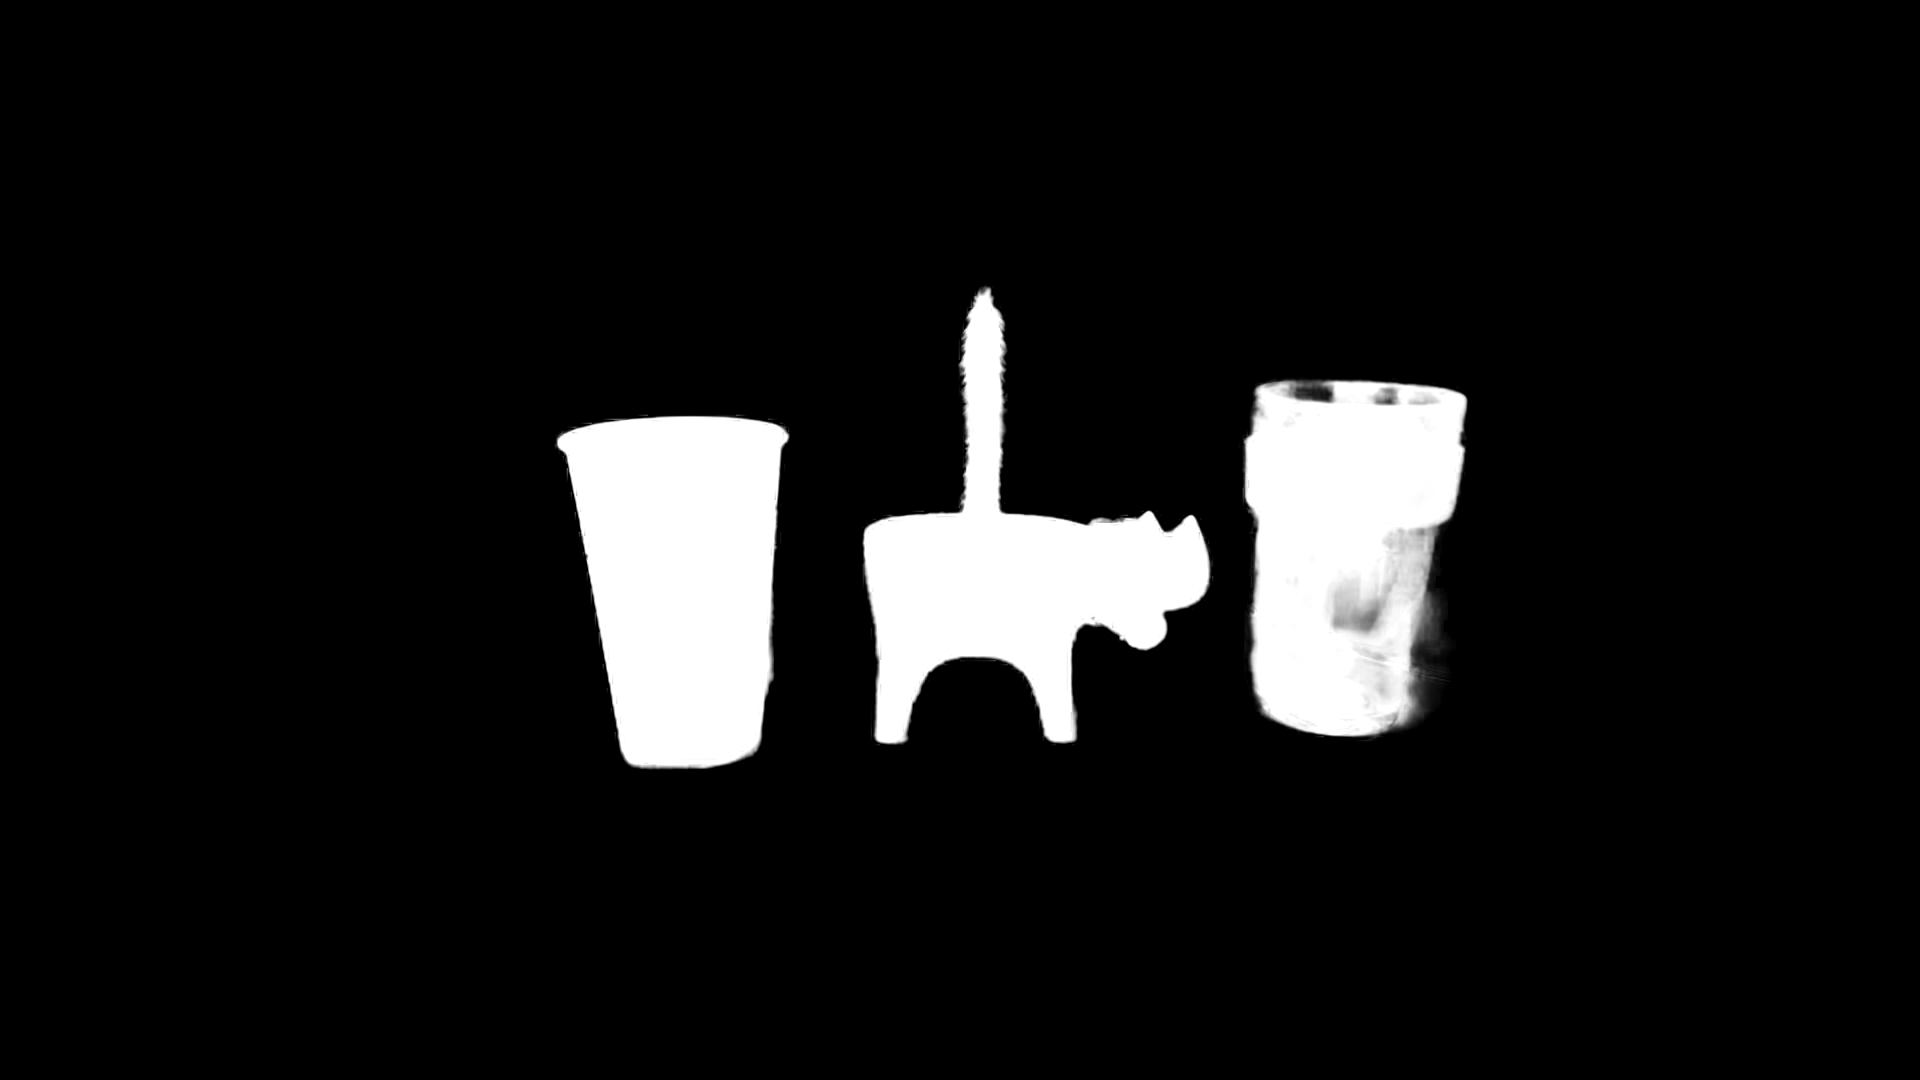

In [47]:
to_pil_image(pha[0].cpu())


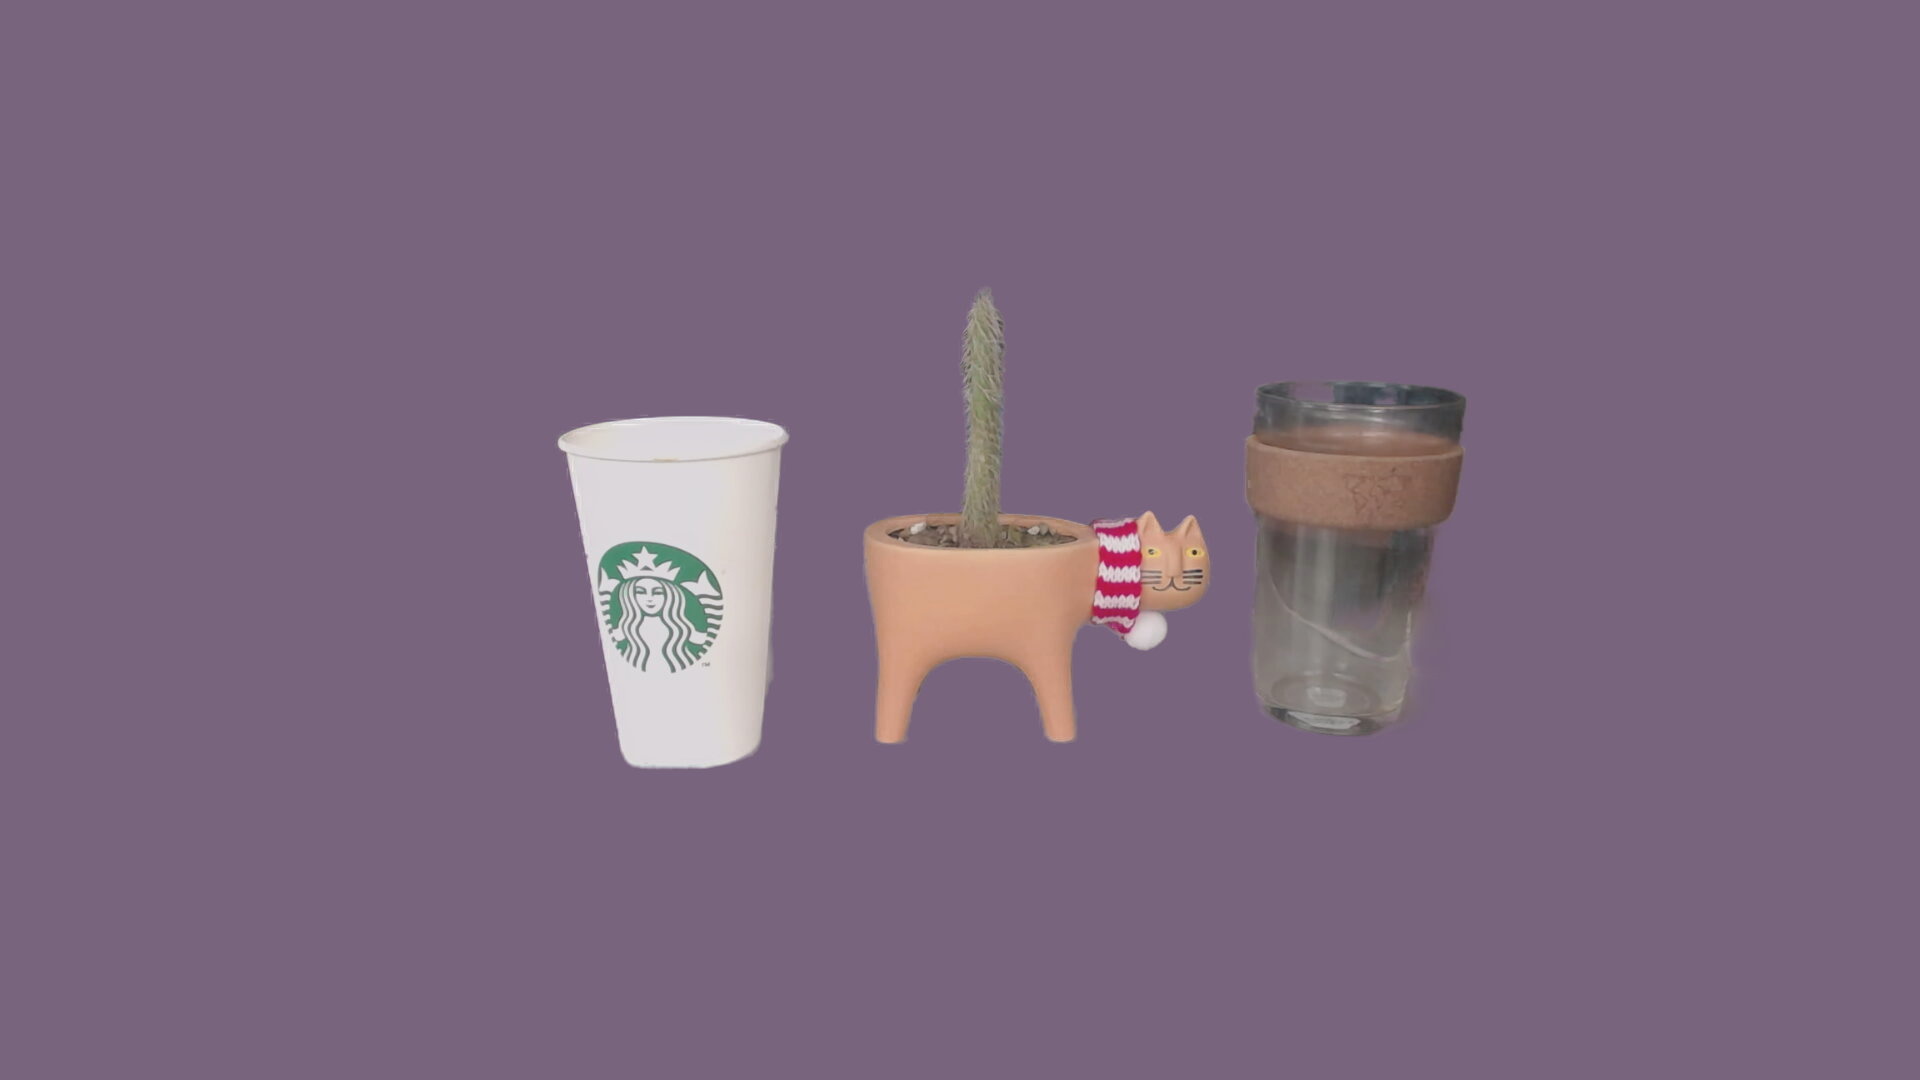

In [48]:
to_pil_image(com[0].cpu())

In [20]:
to_pil_image(pha[0].cpu()).save('pha.png')
to_pil_image(fgr[0].cpu()).save('fgr.png')
to_pil_image(com[0].cpu()).save('com.png')